In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [30]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [33]:
x_train.shape

(25000, 10000)

In [34]:
train_data.shape

(25000,)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [36]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [37]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [38]:
check=np.array(train_labels).astype('float32')
check

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [43]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.5087 - acc: 0.7813 - val_loss: 0.3799 - val_acc: 0.8693
Epoch 2/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.3008 - acc: 0.9051 - val_loss: 0.3006 - val_acc: 0.8901
Epoch 3/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.2181 - acc: 0.9277 - val_loss: 0.3087 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.1751 - acc: 0.9435 - val_loss: 0.2841 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.1426 - acc: 0.9542 - val_loss: 0.2846 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.1150 - acc: 0.9653 - val_loss: 0.3155 - val_acc: 0.8773
Epoch 7/20
 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0915 - acc: 0.9753

15000/15000 [==============================] - 3s 189us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_acc: 0.8846
Epoch 8/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.0807 - acc: 0.9765 - val_loss: 0.3853 - val_acc: 0.8652
Epoch 9/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.0661 - acc: 0.9821 - val_loss: 0.3633 - val_acc: 0.8783
Epoch 10/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.0558 - acc: 0.9853 - val_loss: 0.3841 - val_acc: 0.8792
Epoch 11/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.0451 - acc: 0.9889 - val_loss: 0.4160 - val_acc: 0.8767
Epoch 12/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.0385 - acc: 0.9914 - val_loss: 0.4503 - val_acc: 0.8697
Epoch 13/20
11776/15000 [======================>.......] - ETA: 0s - loss: 0.0273 - acc: 0.9949

15000/15000 [==============================] - 3s 188us/step - loss: 0.0300 - acc: 0.9931 - val_loss: 0.4693 - val_acc: 0.8729
Epoch 14/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.0247 - acc: 0.9948 - val_loss: 0.5020 - val_acc: 0.8713
Epoch 15/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.0174 - acc: 0.9981 - val_loss: 0.5612 - val_acc: 0.8649
Epoch 16/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.0174 - acc: 0.9965 - val_loss: 0.5765 - val_acc: 0.8701
Epoch 17/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.0091 - acc: 0.9994 - val_loss: 0.6091 - val_acc: 0.8685
Epoch 18/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.0105 - acc: 0.9983 - val_loss: 0.6404 - val_acc: 0.8677
Epoch 19/20
11264/15000 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.9998

15000/15000 [==============================] - 3s 186us/step - loss: 0.0106 - acc: 0.9978 - val_loss: 0.6735 - val_acc: 0.8667
Epoch 20/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.0040 - acc: 0.9999 - val_loss: 0.6955 - val_acc: 0.8662


In [0]:
 history_dict = history.history

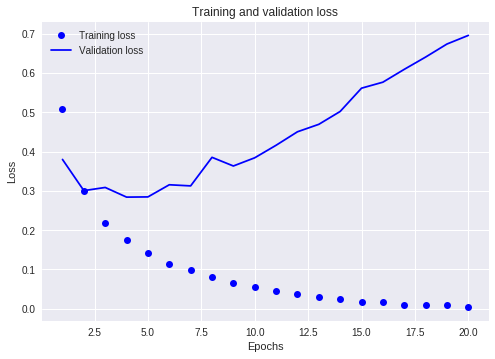

In [50]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs =  range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

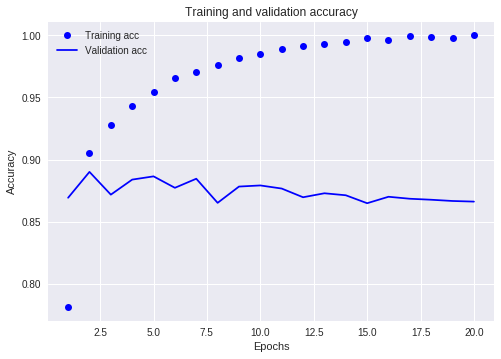

In [51]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
epochs

range(1, 21)

In [53]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 192us/step - loss: 0.4738 - acc: 0.8222
Epoch 2/4
25000/25000 [==============================] - 3s 139us/step - loss: 0.2674 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.2033 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 2s 77us/step


In [54]:
model.predict(x_test)

array([[0.15886606],
       [0.9998516 ],
       [0.3923463 ],
       ...,
       [0.08213342],
       [0.04940793],
       [0.45541877]], dtype=float32)

In [55]:
results

[0.3114856664943695, 0.87612]

In [56]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [57]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',